# **Machine Learning : Linear Regression in the beginning**

This tutorial series is for absolute beginners in machine learning Linear Regression algorithm, for those who want to review/practice the fundamentals of machine learning and how to build them from scratch.

# **What is Machine Learning?**

Machine learning is a field of inquiry devoted to understanding and building methods that 'learn', that is, methods that leverage data to improve performance on some set of tasks. It is seen as a part of artificial intelligence.

# **Type of Machine Learning Systems**

#### **1.Supervised Learning**
#### **2.Unsupervised Learning**
#### **3.Semi-Supervised Learning**
#### **4.Reinforcement Learning**

# **Supervised Learning :**

In supervised learning, the training data you feed to the algorithm includes the desired solutions, called labels

* A typical supervised learning task is classification. The spam filter is a good example of this: it is trained with many examples emails along with their class (spam or ham), and it must learn how to classify new emails.

* Another typical task is to predict a target numeric value, such as the price of a car, given a set of features (mileage, age, brand, etc.) called predictors. This sort of task is called regression. To train the system, you need to give it many examples of cars, including both their predictors and their labels (i.e., their prices)


#### **## Let's get the data and dive into Linear Regression and examine it!.**

Let's start with a very simple task of linear regression using a sample dataset called headbrain, wherein we are given some features of a brain    <br>(i.e. Head Size(cm^3 , Brain Weight(grams), etc) and predict the Brain Weight.

### **Import Libraries**

In [ ]:
import numpy as np  #python library for scientific computing
import pandas as pd #python library for data analysis and dataframes
import matplotlib.pyplot as plt #python library for plotting graphs

In [ ]:
df=pd.read_csv('../input/headbrain/headbrain.csv') # Importing/Connecting the headbrain dataset into python.

### DATA PROCESSING

In [ ]:
df.head() # Reading the dataframe.

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
df.isnull().sum() # Analysing count of null values in columns

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [ ]:
df.info() # Analysing Columns Datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [ ]:
df.corr() # Analysing correlation between each columns

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
Gender,1.000000,-0.088652,-0.514050,-0.465266
Age Range,-0.088652,1.000000,-0.105428,-0.169438
Head Size(cm^3),-0.514050,-0.105428,1.000000,0.799570
Brain Weight(grams),-0.465266,-0.169438,0.799570,1.000000


##### ## Remember we are trying to see if brain weight DEPENDS on head size. So brain weight is dependent and head size is independent.

In [ ]:
X=df['Head Size(cm^3)'].values # X is independent variable
Y=df['Brain Weight(grams)'].values # Y is dependent variable

## **Finding the best fit line**

Linear Regression Model Formular:

#### **ȳ = mx̅ + c**

#### where; **m = Σ((x-x̅)(y-ȳ)) / Σ(x-x̅)²**      

( ȳ and x̅ is mean )

Using m for in the least square method, we can find the best fitting line, the regression line.

In [ ]:
mean_x=np.mean(X)
mean_y=np.mean(Y)

n=len(X)

#using the formular, let's find m
numerator=0
denominator=0

for i in range(n):
  numerator=((X[i]-mean_x)*(Y[i]-mean_y))+numerator
  denominator=((X[i]-mean_x)**2)+denominator
m=numerator/denominator
print("m : ",m)


# Let's find c

c=(mean_y)-(m*mean_x)
print("c : ",c)

m :  0.26342933948939945
c :  325.57342104944223


##### **m :**   0.26342933948939945 
##### **c :**   325.57342104944223


Now it's time to visualize the algorithm on a plot graph

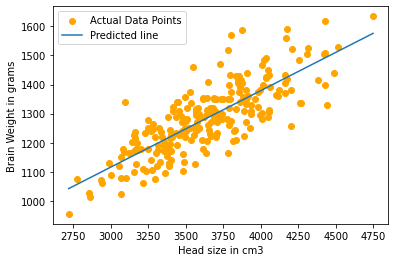

In [ ]:
max_x = np.max(X)  
min_x = np.min(X) 

x = np.linspace(min_x, max_x) #Prediction Line
y = c + (m * x) #Prediction Line

plt.scatter(X,Y,color='orange',label='Actual Data Points') # Plotting scatter graph 
plt.plot(x,y,label='Predicted line') # Plotting predicted line
plt.xlabel('Head size in cm3') # Giving label to x axis
plt.ylabel('Brain Weight in grams') # Giving label to y axis
plt.legend() 
plt.show()

# R-SQUARED METHOD - Goodness of fit
By definition, this is the measure of how close the data are fitted to the regression line. By formular; R² = 1 - (Σ(y-yₚ)²) / (Σ(y-ȳ)²)

In [ ]:
denum = 0
numer = 0

for i in range(n): #n is the len of X from above
    y_pred = (m * X[i]) + c
    numer += (Y[i] - y_pred) ** 2
    denum += (Y[i] - mean_y) ** 2
    
r_squared = 1 - (numer / denum)
print(r_squared * 100, "percent")

63.93117199570003 percent


63.93117199570003 percent

# **SCIKIT LEARN IMPLEMENTATION**

### **Importing sklearn Library**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# we cannot use rank 1 matrices in sklearn so we reshape

X=df['Head Size(cm^3)'].values.reshape(-1,1)      
Y=df['Brain Weight(grams)'].values.reshape(-1,1) 

model=LinearRegression().fit(X,Y)     #Fitting my model 
predicted=model.predict(X)           # Predicting the model with respect to X(Independent Variable)

print("Coefficients: ", model.coef_)
print("Mean squared error: %.2f"  % mean_squared_error(X,predicted))
print("R_squared_score : %.2f" % r2_score(Y, predicted))

Coefficients:  [[0.26342934]]
Mean squared error: 5599834.09
R_squared_score : 0.64


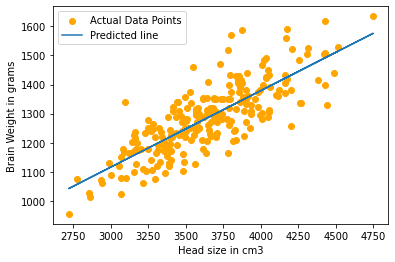

In [ ]:
plt.scatter(X,Y,color='orange',label='Actual Data Points') # Plotting scatter graph 
plt.plot(X,predicted,label='Predicted line') # Plotting predicted line
plt.xlabel('Head size in cm3') # Giving label to x axis
plt.ylabel('Brain Weight in grams') # Giving label to y axis
plt.legend() 
plt.show()

As you can see, it is a perfect replication of what was built from scratch. There you have it, **linear regression from scratch.**